In [7]:
import geopandas as gpd
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

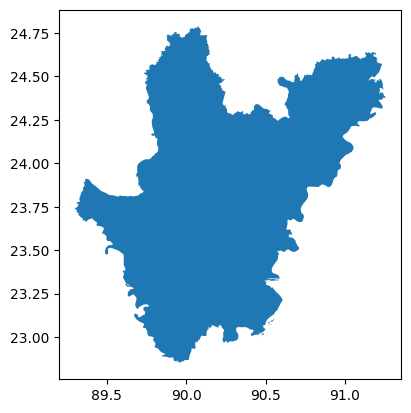

In [ ]:


path = "/home/rishabh.mondal/Brick-Kilns-project/ijcai_2025_kilns/regions/shapes/dhaka.geojson"
gdf = gpd.read_file(path)
gdf = gdf.to_crs(epsg=4326)
gdf.plot()
plt.show()


In [10]:
import geopandas as gpd
import os
import shutil
from shapely.geometry import Point

# Path to Dhaka GeoJSON
geojson_path = "/home/rishabh.mondal/Brick-Kilns-project/ijcai_2025_kilns/regions/shapes/dhaka.geojson"
gdf = gpd.read_file(geojson_path).to_crs(epsg=4326)
dhaka_polygon = gdf.unary_union

# Source label directory
label_dir = "/home/rishabh.mondal/Brick-Kilns-project/ijcai_2025_kilns/data/processed_data/sentinel/Bangladesh/labels"

# Destination directory
output_dir = "/home/rishabh.mondal/Brick-Kilns-project/ijcai_2025_kilns/data/processed_data/sentinel/Bangladesh/dhaka/labels"
os.makedirs(output_dir, exist_ok=True)

# Loop and copy files
for filename in os.listdir(label_dir):
    if filename.endswith(".txt"):
        try:
            lat_str, lon_str = filename.replace(".txt", "").split("_")
            lat, lon = float(lat_str), float(lon_str)
            point = Point(lon, lat)  # shapely uses (lon, lat)
            if dhaka_polygon.contains(point):
                src = os.path.join(label_dir, filename)
                dst = os.path.join(output_dir, filename)
                shutil.copy(src, dst)
        except ValueError:
            print(f"Skipping invalid filename: {filename}")


/tmp/ipykernel_3790364/724580338.py:9: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  dhaka_polygon = gdf.unary_union


In [9]:
print("Total matching files:", len(matching_files))

Total matching files: 1449


In [11]:
import os
import shutil

# Paths
label_dir = "/home/rishabh.mondal/Brick-Kilns-project/ijcai_2025_kilns/data/processed_data/sentinel/Bangladesh/dhaka/labels"
image_dir = "/home/rishabh.mondal/Brick-Kilns-project/ijcai_2025_kilns/data/processed_data/sentinel/Bangladesh/images"
output_image_dir = "/home/rishabh.mondal/Brick-Kilns-project/ijcai_2025_kilns/data/processed_data/sentinel/Bangladesh/dhaka/images"

# Make sure output dir exists
os.makedirs(output_image_dir, exist_ok=True)

# Copy corresponding images
for label_file in os.listdir(label_dir):
    if label_file.endswith(".txt"):
        image_file = label_file.replace(".txt", ".png")  # or .jpg, adjust as needed
        src_img_path = os.path.join(image_dir, image_file)
        dst_img_path = os.path.join(output_image_dir, image_file)
        if os.path.exists(src_img_path):
            shutil.copy(src_img_path, dst_img_path)
        else:
            print(f"Image not found for label: {label_file}")
